<a href="https://colab.research.google.com/github/Juancarlos56/Repositorio-Simulacion-10/blob/main/TareasEnClases/Tarea5_PseudoAleatoriosUniformidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio en clases:**
Calcular, graficar y obtener el valor de Chi Cuadrado para los siguientes generadores con las siguientes semillas:

* Cuadrados medios: Xo=74731897457, D=7
* Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19
* Tauswoth q=7, r=3, l=5
* Random de Python semilla (11052022)



In [2]:
# Importanmos las librerias
import random
import matplotlib.pyplot as plt
import numpy as np


In [21]:
#Defino una funcion para generar los 100 numeros pseudoaletaroios, 
#en este caso estoy utilizando la libreria de Python random
def random_python(semilla=11052022,N=100):
  numeros = []
  random.seed(semilla)
  [numeros.append(random.random())for i in range(N)]
  return numeros

In [1]:
def cuadrados_medios(semilla, num_digitos, N=100):
  numeros = []
  xo = semilla
  digitos = num_digitos
  iteraciones = N
  xn = xo
  for i in range(iteraciones):
    xnn = xn**2
    txnn = str(xnn).zfill(8)
    tam = len(txnn)
    ui = int(txnn[int(tam/2-digitos/2):int(tam/2+digitos/2)])
    rn = ui / (int('9'*digitos)+1)
    numeros.append(rn)
    xn = ui
  return numeros  

In [8]:
def congruencia_lineal(semilla=7, valor_a=74731897457, valor_b=37747318974, valor_m=19, N=100): 
  xo = semilla
  a = valor_a
  b = valor_b
  m = valor_m
  iteraciones = N
  numeros = []
  xn = xo
  for i in range(iteraciones):
    xnn = (a*xn+b) % m
    ui = xnn/m
    numeros.append(ui)
    xn = xnn
  return numeros

In [14]:
def generador_tauswoth(r=3, q=7, l=5, N=100):

  valor_r = r
  valor_q = q

  if (0 < valor_r) and (valor_r < valor_q) :
    condicion = True
  else:
    print("\n Condicion: r y q deben cumplir 0 < r < q. \n")  
    return

  valor_nm = N*l
  listaNumerosBinarios = []

  ##Creacion de valores binarios con formula bi = (bi-r + bi-q) mod 2
  for i in range(0,valor_nm):
    if(i<valor_q):
      listaNumerosBinarios.append(1)
    else: 
      listaNumerosBinarios.append((listaNumerosBinarios[i-valor_r]+listaNumerosBinarios[i-valor_q]) % 2)

  ##Agrupar para conversion 
  valor_l = l
  valor_agrupaciones = int(valor_nm/valor_l)
  posicion = 0 
  aux = valor_l
  cont = 0
  listaValoresNumericos = []

  for j in range(0,valor_agrupaciones):
    sublista =listaNumerosBinarios[cont:aux] 
    binario_To_Decimal = 0
    cont2 = 0
    for k in range(len(sublista)-1,-1,-1):
      if(sublista[cont2]==1): 
        binario_To_Decimal = 2**(k) + binario_To_Decimal
      cont2 = cont2 + 1
    listaValoresNumericos.append(round((binario_To_Decimal / (2**valor_l)),2))
    cont = cont + valor_l
    aux = aux + valor_l
    
  return listaValoresNumericos

In [23]:
#Defino una funcion para realizar un conteo de los numeros que caen dentro de cada intervalo
def calcular_chi(numeros):
  tablas = {}
  for i in np.arange(0.1, 1.1, 0.1): # aqui separo en intervalos de 0.1
    for j in numeros:
      if j > i-0.1 and j <= i: # Compruebo si el valor esta dentro del intervalor
        tablas[round(i-0.1,1)] = tablas[round(i-0.1,1)]+1 if round(i-0.1,1) in tablas else 1
  return tablas

In [24]:
#defino una funcion para aplicar la formula y obtener la desviacion estandar de cada intervalo  
def sumatoria_chi(tabla, E):
  return sum([(valor-E)**2/E for valor in tabla.values()])

In [25]:
#Defino una funcion para graficar en un cuadro de barras los valores de cada intervalo
def graficar(tabla):
  plt.bar(range(len(tabla)), list(tabla.values()), tick_label=list(tabla.keys()))
  plt.show()

### Calculo de Uniformidad de Cuadrados Medios

Numeros Aleatorios generados:  [0.7523, 0.5955, 0.462, 0.3444, 0.8611, 0.1493, 0.229, 0.2441, 0.9584, 0.853, 0.7609, 0.8968, 0.425, 0.0625, 0.3906, 0.2568, 0.5946, 0.3549, 0.5954, 0.4501, 0.259, 0.7081, 0.1405, 0.974, 0.8676, 0.2729, 0.4474, 0.0166, 0.0275, 0.0756, 0.5715, 0.6612, 0.7185, 0.6242, 0.9625, 0.6406, 0.0368, 0.1354, 0.8333, 0.4388, 0.2545, 0.477, 0.7529, 0.6858, 0.0321, 0.103, 0.0609, 0.3708, 0.7492, 0.13, 0.69, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61]

Tabla de intervalos y el conteo de numeros dentro de cada intervalo
{0.0: 7, 0.1: 5, 0.2: 18, 0.3: 4, 0.4: 18, 0.5: 4, 0.6: 18, 0.7: 6, 0.8: 17, 0.9: 3}

Calculamos el valor de chi cuadrado
41.2

Grafica de barras


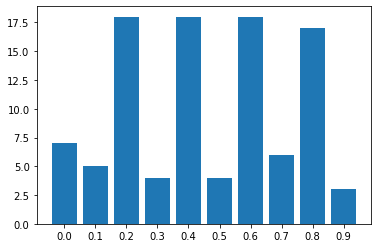

In [37]:
numerosRandomCuadradosMedios = cuadrados_medios(74731897457, 4, 100)
print("Numeros Aleatorios generados: ",numerosRandomCuadradosMedios)
print("\nTabla de intervalos y el conteo de numeros dentro de cada intervalo")
tablas = calcular_chi(numerosRandomCuadradosMedios)
print(tablas)
print("\nCalculamos el valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))
print("\nGrafica de barras")
graficar(tablas)  

### Calculo de Uniformidad de Congruencia Lineal

Numeros Aleatorios generados:  [0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421

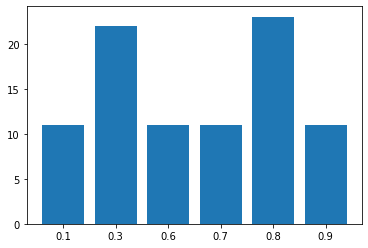

In [38]:
numerosRandomCongruenciaLineal = congruencia_lineal(7, 74731897457, 37747318974, 19, 100)
print("Numeros Aleatorios generados: ",numerosRandomCongruenciaLineal)

print("\nTabla de intervalos y el conteo de numeros dentro de cada intervalo")
tablas = calcular_chi(numerosRandomCongruenciaLineal)
print(tablas)

print("\nCalculamos el valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))

print("\nGrafica de barras")
graficar(tablas)  


### Calculo de Uniformidad de Generador de Tauswoth

Numeros Aleatorios generados:  [0.97, 0.75, 0.91, 0.53, 0.28, 0.47, 0.66, 0.25, 0.34, 0.47, 0.22, 0.16, 0.38, 0.75, 0.19, 0.81, 0.91, 0.09, 0.12, 0.25, 0.06, 0.28, 0.62, 0.94, 0.88, 0.22, 0.94, 0.22, 0.38, 0.31, 0.34, 0.91, 0.31, 0.06, 0.84, 0.78, 0.78, 0.34, 0.19, 0.03, 0.69, 0.72, 0.25, 0.78, 0.06, 0.0, 0.56, 0.41, 0.22, 0.72, 0.03, 0.97, 0.53, 0.84, 0.06, 0.56, 0.97, 0.31, 0.5, 0.69, 0.94, 0.44, 0.31, 0.78, 0.5, 0.41, 0.66, 0.81, 0.19, 0.25, 0.5, 0.12, 0.59, 0.28, 0.91, 0.75, 0.47, 0.88, 0.44, 0.75, 0.62, 0.72, 0.81, 0.62, 0.16, 0.72, 0.59, 0.56, 0.69, 0.38, 0.09, 0.41, 0.44, 0.53, 0.56, 0.12, 0.03, 0.12, 0.81, 0.47]

Tabla de intervalos y el conteo de numeros dentro de cada intervalo
{0.0: 9, 0.1: 9, 0.2: 11, 0.3: 10, 0.4: 13, 0.5: 9, 0.6: 8, 0.7: 12, 0.8: 8, 0.9: 10}

Calculamos el valor de chi cuadrado
2.5

Grafica de barras


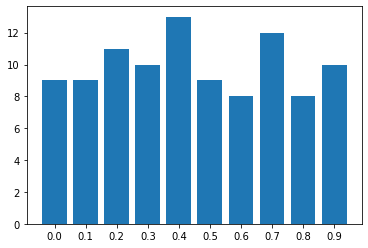

In [42]:
numerosRandomtauswoth = generador_tauswoth(3, 7, 5, 100)
print("Numeros Aleatorios generados: ",numerosRandomtauswoth)

print("\nTabla de intervalos y el conteo de numeros dentro de cada intervalo")
tablas = calcular_chi(numerosRandomtauswoth)
print(tablas)

print("\nCalculamos el valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))

print("\nGrafica de barras")
graficar(tablas) 

### Calculo de Uniformidad de Libreria Random Python

Numeros Aleatorios generados:  [0.39122091339712006, 0.08673940245642964, 0.9233776991044218, 0.5643281259214213, 0.5018754578724773, 0.6092906311578306, 0.7944410154604006, 0.4745506456495402, 0.3496767363331855, 0.08044631797968471, 0.6263578731542199, 0.2036014039706825, 0.32266209276724567, 0.1789720571675194, 0.51299029248829, 0.7770010208223913, 0.5449750015006763, 0.6965377945580097, 0.17325150202955186, 0.9000269906696816, 0.7996854776854797, 0.35322968565101953, 0.6711727475466924, 0.28345737390743064, 0.37350518006964006, 0.37916716408773543, 0.17048123118844705, 0.823379948568777, 0.22300266321497408, 0.051569135814649614, 0.1922950198508785, 0.8634191905130083, 0.5439027360115081, 0.12556216958312505, 0.34124337838965746, 0.6811002910449016, 0.07304203459633685, 0.12499764479557629, 0.2036691179102461, 0.5579574657844889, 0.7421399105045708, 0.5911979676257648, 0.985890474077214, 0.36352070742615483, 0.8983386409438613, 0.045274687387145685, 0.010854410020205485, 0.10747868

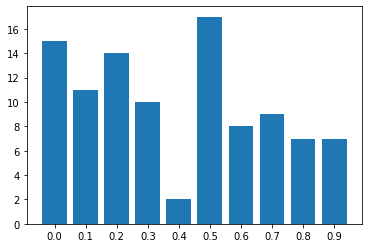

In [44]:
import random
numerosRandomLibreary = random_python(11052022, 100)
print("Numeros Aleatorios generados: ",numerosRandomLibreary)

print("\nTabla de intervalos y el conteo de numeros dentro de cada intervalo")
tablas = calcular_chi(numerosRandomLibreary)
print(tablas)

print("\nCalculamos el valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))

print("\nGrafica de barras")
graficar(tablas) 

### Conclusiones 

1. Metodo Cuadrados Lineales: 41.2
2. Metodo Congruencia Lineal: 31.7
2. Metodo Generador de Tausworthe: 2.5
2. Metodo Random Libreria Python: 17.8

Se obtiene que el metodos de Tausworthe pasa la prueba de distribucion de uniformidad, ya que segun la tabla de distribucion de chi-cuadrada, el valor de chi no deberia ser superior a 16.919, tomando 10 grados de libertad. 

```χ_obtenida^2 ⩽ χ_0.05,9^2 = 2.5 ⩽ 16.9```



**Nota:** Estos datos hay que tener en cuenta siempre y cuando con las semillas y parametros solicitados, ya que la modificación de estos, pueden llegar a cambiar drasticamente el resultado. 
